# Matplotlib — Beginner to Pro

A clean, practical guide to Python data visualization for real analysis, reporting, and dashboards — using core Matplotlib only. From first line plots to presentation-ready KPI figures.

**TL;DR:** One plot, one idea. Clean defaults. Dashboard-ready patterns.

- Clear, minimal examples — one plot per concept  
- Realistic toy data + classic Iris (scikit-learn)  
- Consistent styling — color-blind-safe palette, readable grid, clean layout  
- Dashboard patterns — KPI tiles, trends, campaign highlights, ROC  
- Compact cheat sheet — fast reference for core chart types

Use this as your visual toolkit for EDA, model explanation, and stakeholder slides.


## Table of Contents

0) Reproducibility

1) Global Style

2) Quick Gallery — Core Chart Types

3) Beginner — Essential Plots

4) Intermediate — Customization & Clarity

5) Advanced Patterns for ML / Analytics Dashboards

6) Pandas → Matplotlib for Reporting (Business Plots Fast)

7) Iris Dataset Overview

8) Signature Visuals — From Analysis to Storytelling

9) Best Practices & Pitfalls

10) Cheat Sheet — Core Visualization Patterns


## 0) Reproducibility

In [1]:
import warnings, pathlib
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.datasets import load_iris
from IPython.display import display

# Reproducibility
SEED = 42
rng = np.random.default_rng(SEED)
np.random.seed(SEED)

# Environment info
import sys
print(f"Python: {sys.version.split()[0]}")
print(f"NumPy: {np.__version__} | Pandas: {pd.__version__}")
print(f"Matplotlib: {mpl.__version__}")

try:
    get_ipython().run_line_magic(
        "config",
        "InlineBackend.print_figure_kwargs = {'bbox_inches': None}"
    )
except Exception:
    pass

# Utility — savefig helper
def savefig(fig, path, dpi=300):
    out = pathlib.Path("figures")
    out.mkdir(exist_ok=True)
    file = out / path
    fig.savefig(
        file,
        dpi=dpi,
        bbox_inches="tight",
        facecolor=fig.get_facecolor()
    )
    print(f"Saved → {file}")

# Tip:
# Every figure in this notebook can be exported at publication quality
# using: savefig(fig, "name.png", dpi=300)


Python: 3.11.13
NumPy: 1.26.4 | Pandas: 2.2.3
Matplotlib: 3.7.2


## 1) Global Style

In [2]:
# Global style defaults for consistency.
# Individual figures may override figsize where needed for dashboards.

mpl.rcParams.update({
    "figure.figsize": (7, 4),
    "figure.constrained_layout.use": True,

    # Background
    "figure.facecolor": "#fafafa",
    "axes.facecolor": "#fdfdfd",

    # Fonts & colors
    "font.family": "DejaVu Sans",
    "font.size": 11,
    "axes.labelcolor": "#222",
    "xtick.color": "#333",
    "ytick.color": "#333",

    # Spines & grid
    "axes.edgecolor": "#333",
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.color": "#c9c9c9",
    "grid.alpha": 0.25,
    "grid.linestyle": "--",

    # Color palette (colorblind-friendly)
    "axes.prop_cycle": plt.cycler(color=[
        "#0072B2", "#D55E00", "#009E73",
        "#CC79A7", "#F0E442", "#56B4E9", "#E69F00"
    ])
})

print("Matplotlib style applied.")


Matplotlib style applied.


## 2) Quick Gallery — Core Chart Types


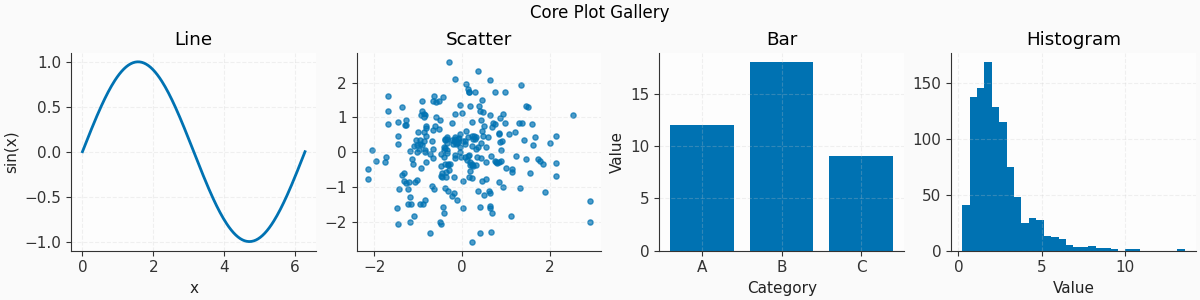

In [3]:
## Core Plot Gallery

fig, axs = plt.subplots(1, 4, figsize=(12, 3), constrained_layout=True)
x = np.linspace(0, 2 * np.pi, 200)

# Line
axs[0].plot(x, np.sin(x), lw=2)
axs[0].set(title="Line", xlabel="x", ylabel="sin(x)")

# Scatter
axs[1].scatter(rng.normal(size=250), rng.normal(size=250), s=14, alpha=0.7)
axs[1].set(title="Scatter")

# Bar
axs[2].bar(["A", "B", "C"], [12, 18, 9])
axs[2].set(title="Bar", xlabel="Category", ylabel="Value")

# Histogram
axs[3].hist(rng.lognormal(0.7, 0.6, 1000), bins=30)
axs[3].set(title="Histogram", xlabel="Value")

fig.suptitle("Core Plot Gallery", fontsize=12)
plt.show()


## 3) Beginner — Essential Plots  

Clean, simple examples of the most common chart types.

### 3.1 line plot

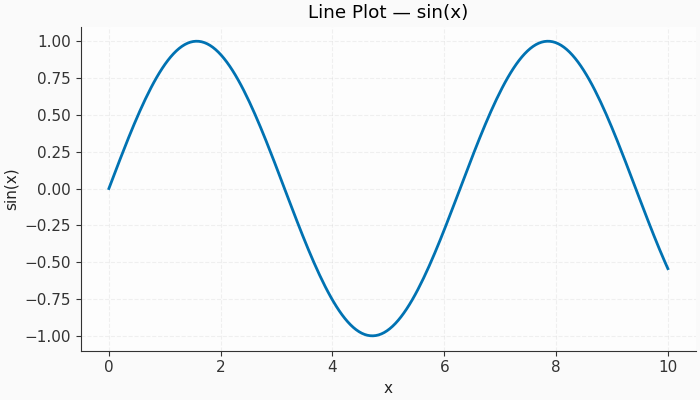

In [4]:
# Basic line plot for a simple trend.

x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y, lw=2)
ax.set(title="Line Plot — sin(x)", xlabel="x", ylabel="sin(x)")

plt.show()


### 3.2 scatter plot: relationship + noise

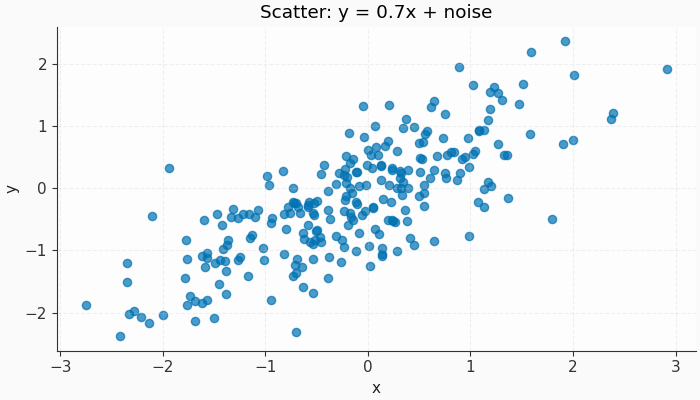

In [5]:
## Scatter Plot — y = 0.7x + noise

n = 250
x = rng.normal(size=n)
y = 0.7 * x + rng.normal(scale=0.6, size=n)

fig, ax = plt.subplots()
ax.scatter(x, y, s=35, alpha=0.7)
ax.set(title="Scatter: y = 0.7x + noise", xlabel="x", ylabel="y")

plt.show()


### 3.3 Bar charts: vertical vs horizontal

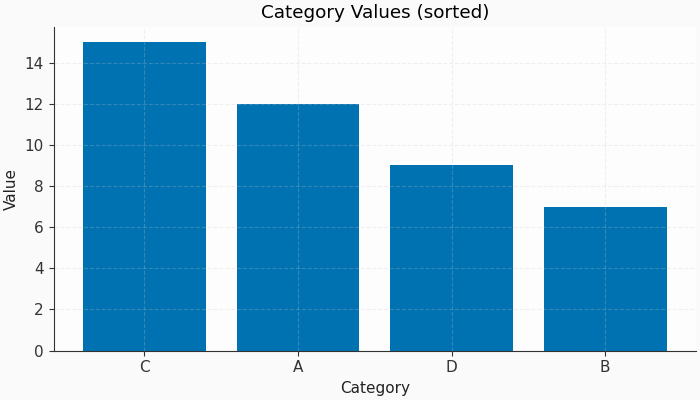

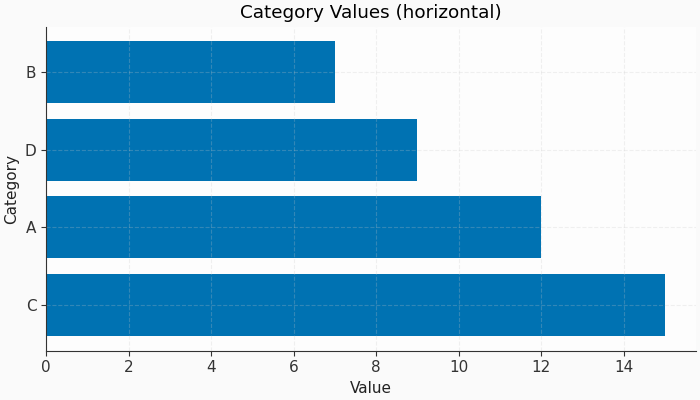

In [6]:
# Compare categories — sorted for easier reading.

cats = ["A", "B", "C", "D"]
vals = [12, 7, 15, 9]

# Sort descending
order = np.argsort(vals)[::-1]
cats, vals = np.array(cats)[order], np.array(vals)[order]

# Vertical
fig, ax = plt.subplots()
ax.bar(cats, vals)
ax.set(title="Category Values (sorted)", xlabel="Category", ylabel="Value")
plt.show()

# Horizontal
fig, ax = plt.subplots()
ax.barh(cats, vals)
ax.set(title="Category Values (horizontal)", xlabel="Value", ylabel="Category")
plt.show()


### 3.4 Histograms: linear vs log scale

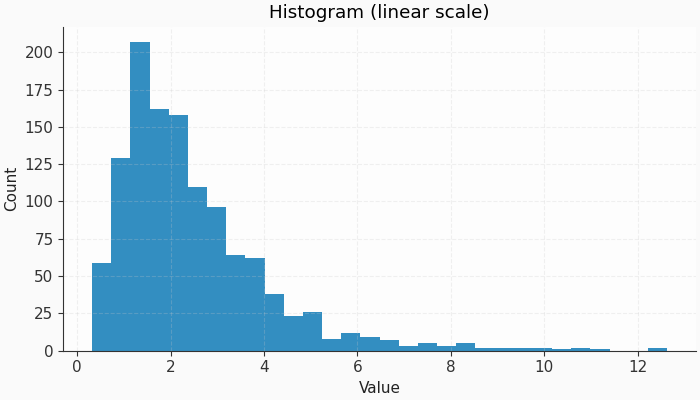

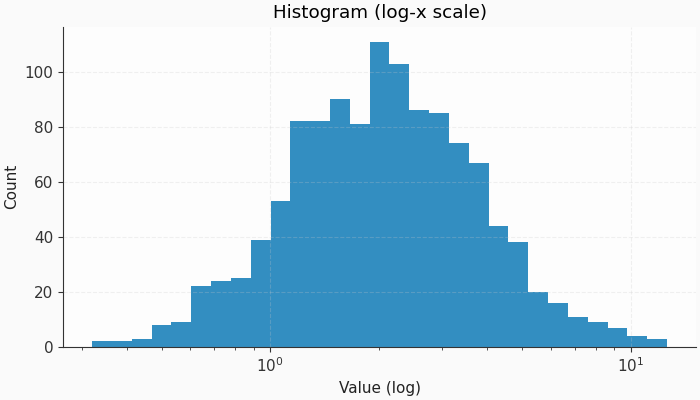

In [7]:
# Heavy-tailed data — compare linear vs log-scaled histogram.

data = rng.lognormal(mean=0.7, sigma=0.6, size=1200)

# Linear scale
fig, ax = plt.subplots()
ax.hist(data, bins=30, alpha=0.8)
ax.set(title="Histogram (linear scale)", xlabel="Value", ylabel="Count")
plt.show()

# Log scale
bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 30)
fig, ax = plt.subplots()
ax.hist(data, bins=bins, alpha=0.8)
ax.set_xscale("log")
ax.set(title="Histogram (log-x scale)", xlabel="Value (log)", ylabel="Count")
plt.show()


### 3.5 Histogram + KDE


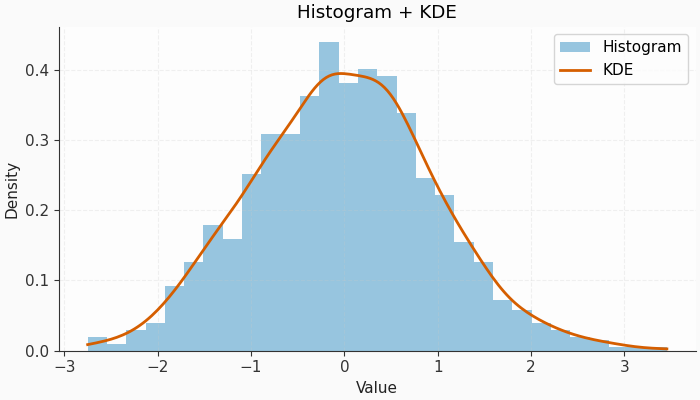

In [8]:
# Compare raw histogram vs smooth KDE density.

data = rng.normal(size=1000)
kde = gaussian_kde(data)

x = np.linspace(data.min(), data.max(), 200)
y = kde(x)

fig, ax = plt.subplots()
ax.hist(data, bins=30, density=True, alpha=0.4, label="Histogram")
ax.plot(x, y, lw=2, label="KDE")
ax.set(title="Histogram + KDE", xlabel="Value", ylabel="Density")
ax.legend()
plt.show()


### 3.6 ECDF 

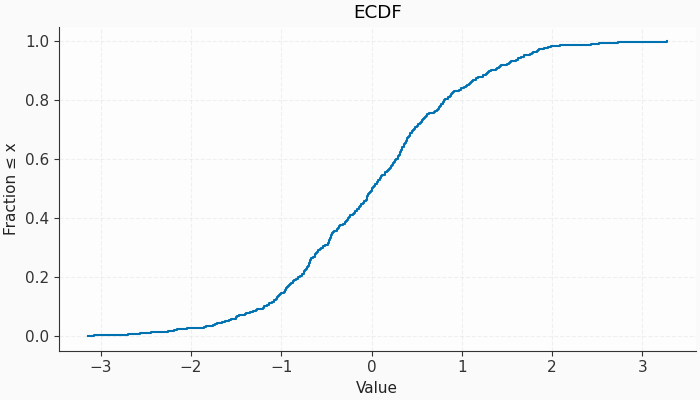

In [9]:
# ECDF — shows cumulative fraction of samples <= x.

vals = np.sort(rng.normal(size=500))
cdf = np.arange(1, len(vals) + 1) / len(vals)

fig, ax = plt.subplots()
ax.step(vals, cdf, where="post")
ax.set(title="ECDF", xlabel="Value", ylabel="Fraction ≤ x")
plt.show()


### 3.7 Boxplot & Violin Comparison

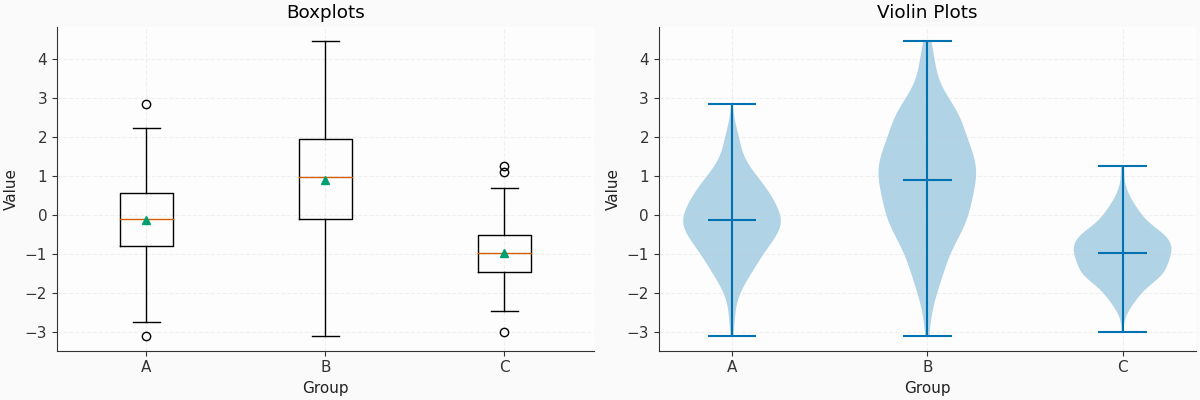

In [10]:
# Compare group distributions — Box vs Violin plots.

samples = [
    rng.normal(size=200) * 1.0 + 0.0,   # A: std~1.0
    rng.normal(size=200) * 1.5 + 1.0,   # B: wider
    rng.normal(size=200) * 0.7 - 1.0,   # C: tighter
]
labels = ["A", "B", "C"]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# Boxplots
axs[0].boxplot(samples, labels=labels, showmeans=True)
axs[0].set(title="Boxplots", xlabel="Group", ylabel="Value")

# Violin plots
axs[1].violinplot(samples, showmeans=True, showextrema=True)
axs[1].set(title="Violin Plots", xlabel="Group", ylabel="Value")
axs[1].set_xticks(range(1, 4))
axs[1].set_xticklabels(labels)

plt.show()


### 3.8 Stacked area over time Plot

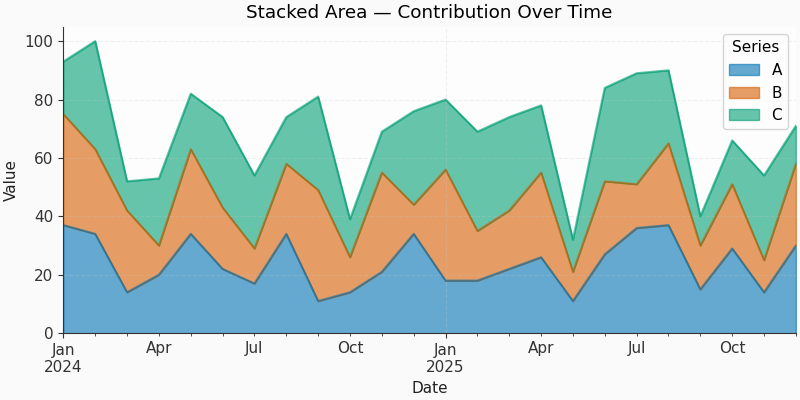

In [11]:
# Stacked area chart — show contribution of each series over time.

dates = pd.date_range("2024-01-01", periods=24, freq="M")
data = rng.integers(10, 40, size=(len(dates), 3))
df = pd.DataFrame(data, index=dates, columns=["A", "B", "C"])

ax = df.plot.area(alpha=0.6, figsize=(8, 4))
ax.set(title="Stacked Area — Contribution Over Time", xlabel="Date", ylabel="Value")
ax.legend(title="Series")
plt.show()


## 4) Intermediate Patterns — Customization & Clarity  

Axis formatting, subplots, annotations, and legends — the core of clear visualization.

### 4.1 Multiple Subplots

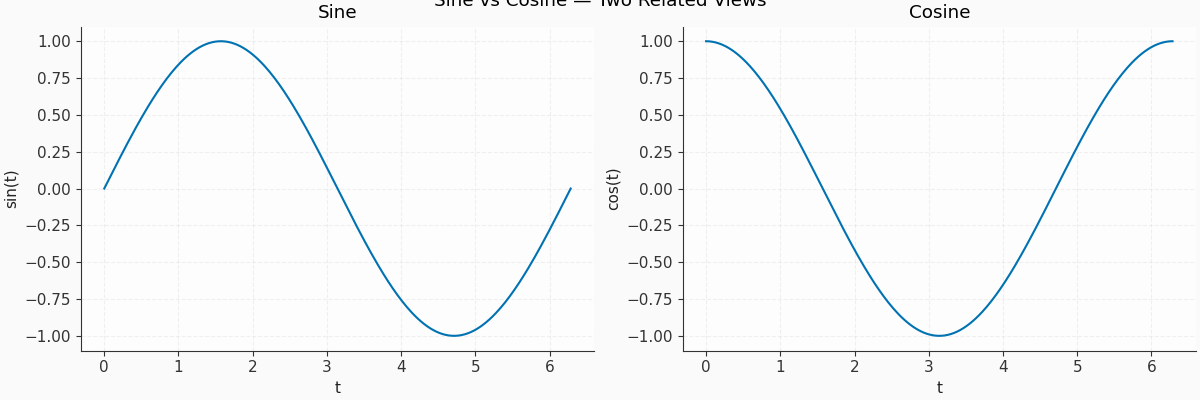

In [12]:
# Subplots — compare related views side by side.

t = np.linspace(0, 2 * np.pi, 300)
fig, axs = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

axs[0].plot(t, np.sin(t))
axs[0].set(title="Sine", xlabel="t", ylabel="sin(t)")

axs[1].plot(t, np.cos(t))
axs[1].set(title="Cosine", xlabel="t", ylabel="cos(t)")

fig.suptitle("Sine vs Cosine — Two Related Views", y=1.02)
plt.show()


### 4.2 Axis Control & Annotation

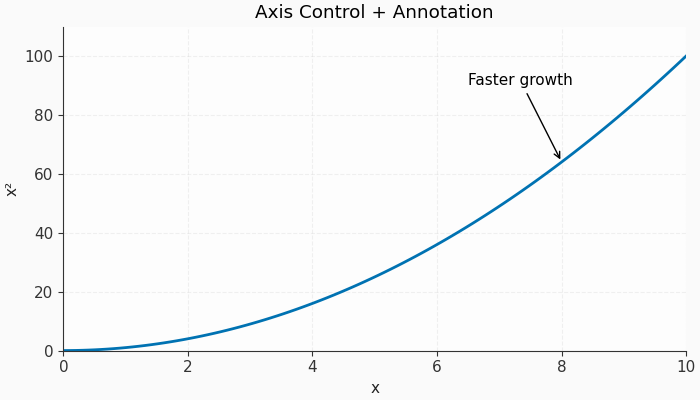

In [13]:
# Axis limits + annotation to highlight key behavior.

x = np.linspace(0, 10, 100)
y = x**2

fig, ax = plt.subplots()
ax.plot(x, y, lw=2)
ax.set(title="Axis Control + Annotation", xlabel="x", ylabel="x²")

ax.set_xlim(0, 10)
ax.set_ylim(0, 110)

ax.annotate(
    "Faster growth",
    xy=(8, 64),
    xytext=(6.5, 90),
    arrowprops=dict(arrowstyle="->")
)

plt.show()


### 4.3 Legends for multiple series

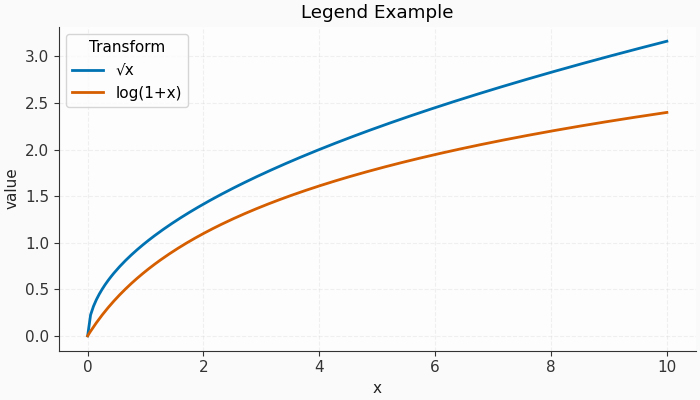

In [14]:
# Multiple lines with legend — compare transformations.

x = np.linspace(0, 10, 200)
fig, ax = plt.subplots()

ax.plot(x, np.sqrt(x), lw=2, label="√x")
ax.plot(x, np.log1p(x), lw=2, label="log(1+x)")

ax.legend(title="Transform")
ax.set(title="Legend Example", xlabel="x", ylabel="value")

plt.show()


### 4.4 Time Series — Campaign Highlight

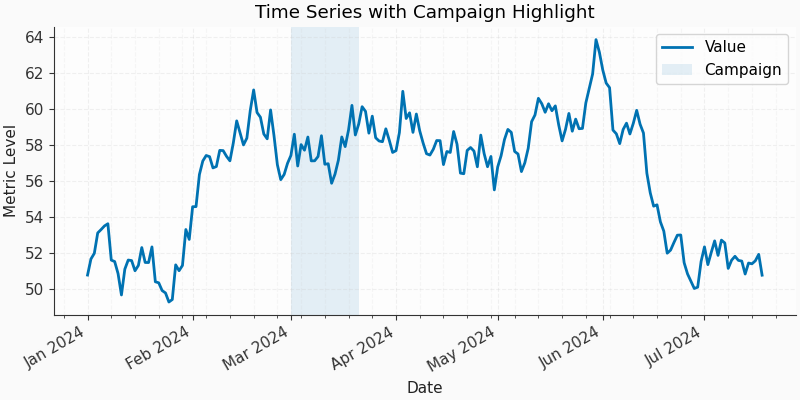

In [15]:
# Time series with monthly ticks, weekly grid, and a highlighted window.

import matplotlib.dates as mdates

dates = pd.date_range("2024-01-01", periods=200, freq="D")
series = pd.Series(np.cumsum(rng.normal(size=len(dates))) + 50, index=dates)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(series.index, series.values, lw=2, label="Value")

# Axis formatting
ax.set(title="Time Series with Campaign Highlight", xlabel="Date", ylabel="Metric Level")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.grid(which="minor", alpha=0.15)

# Highlight window
ax.axvspan("2024-03-01", "2024-03-21", alpha=0.10, label="Campaign")

ax.legend()
fig.autofmt_xdate()
plt.show()


### 4.5 Error Bars + Baseline + Highlight

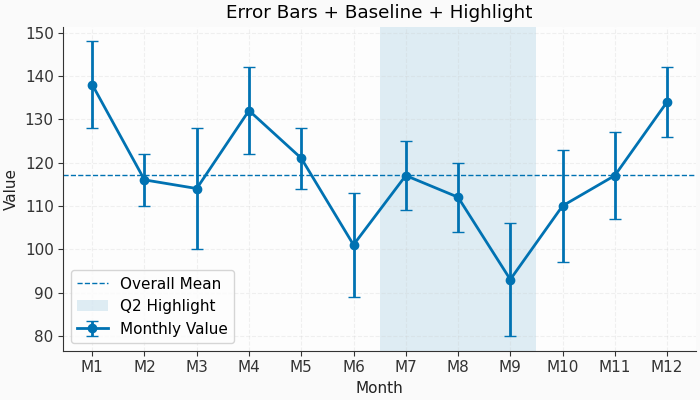

In [16]:
# KPI-style line chart with error bars, baseline, and highlight window.

x = np.arange(12)
y = rng.integers(80, 140, 12)
err = rng.integers(5, 15, 12)

fig, ax = plt.subplots(figsize=(7, 4))
ax.errorbar(x, y, yerr=err, fmt="-o", lw=2, capsize=4, label="Monthly Value")

ax.axhline(y.mean(), ls="--", lw=1, label="Overall Mean")
ax.axvspan(5.5, 8.5, alpha=0.12, label="Q2 Highlight")

ax.set(title="Error Bars + Baseline + Highlight", xlabel="Month", ylabel="Value")
ax.set_xticks(x)
ax.set_xticklabels([f"M{i+1}" for i in x])
ax.legend()
plt.show()


### 4.6 Tick locators and formatters

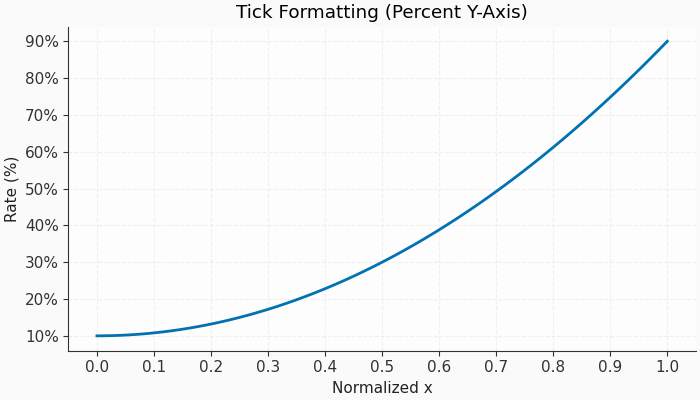

In [17]:
# Format axis ticks: x every 0.1, y as percentages.

import matplotlib.ticker as mtick

x = np.linspace(0, 1, 100)
y = (x**2) * 0.8 + 0.1

fig, ax = plt.subplots()
ax.plot(x, y, lw=2)

ax.xaxis.set_major_locator(mtick.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

ax.set(title="Tick Formatting (Percent Y-Axis)", xlabel="Normalized x", ylabel="Rate (%)")
plt.show()


## 5) Advanced Patterns for ML / Analytics Dashboards

Some patterns you’ll reach for in real EDA and dashboards.

### 5.1 Grouped & Stacked Bars charts

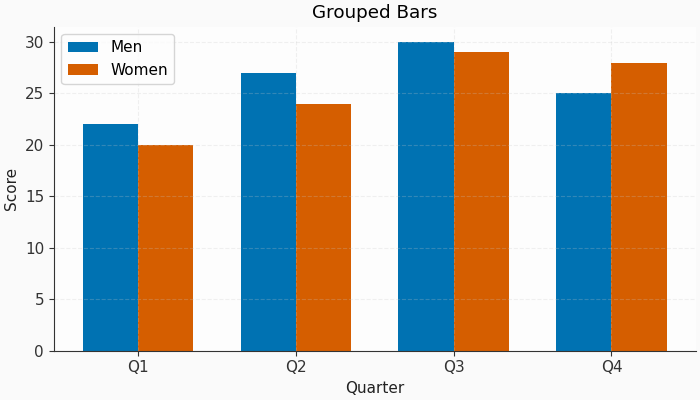

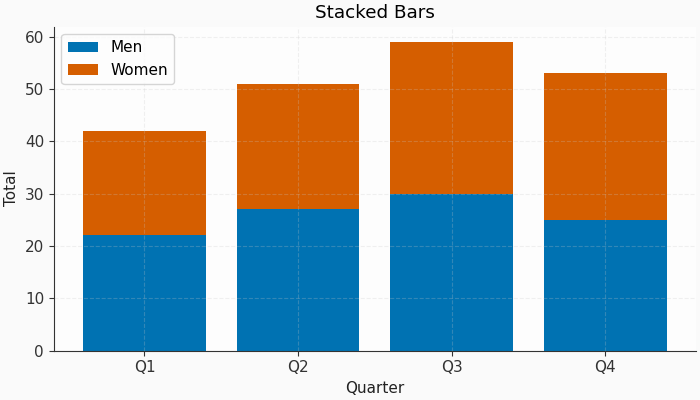

In [18]:
# Grouped vs Stacked Bars — compare categories across periods.

groups = ["Q1", "Q2", "Q3", "Q4"]
men = np.array([22, 27, 30, 25])
women = np.array([20, 24, 29, 28])
x = np.arange(len(groups))
w = 0.35

# Grouped bars (side-by-side)
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(x - w/2, men, w, label="Men")
ax.bar(x + w/2, women, w, label="Women")

ax.set(
    title="Grouped Bars",
    xlabel="Quarter",
    ylabel="Score"
)
ax.set_xticks(x)
ax.set_xticklabels(groups)


ax.legend()
plt.show()


# Stacked bars (total + contribution)
fig, ax = plt.subplots(figsize=(7, 4))
ax.bar(groups, men, label="Men")
ax.bar(groups, women, bottom=men, label="Women")
ax.set(title="Stacked Bars", xlabel="Quarter", ylabel="Total")
ax.legend()
plt.show()


### 5.2 Twin Y-Axes

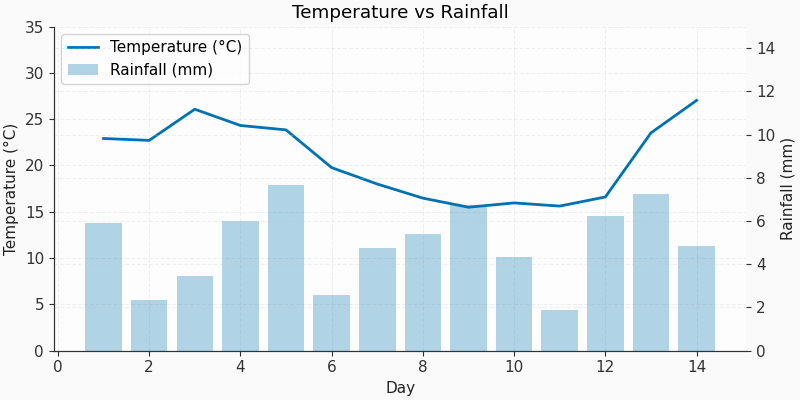

In [19]:
# Two different units, same timeline.
# NOTE: Only do this when both metrics truly share the same x-axis meaning (same days).
# Mixing unrelated axes is a classic way to lie with charts.

days = np.arange(1, 15)  # 14 days
temp = 20 + 5 * np.sin(days / 2) + rng.normal(scale=1.5, size=len(days))  # °C
rain = np.clip(rng.normal(loc=5, scale=2, size=len(days)), 0, None)       # mm

fig, ax1 = plt.subplots(figsize=(8, 4))
ax2 = ax1.twinx()

ax1.plot(days, temp, lw=2, label="Temperature (°C)")
ax2.bar(days, rain, alpha=0.3, label="Rainfall (mm)")

# combine legends from both axes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper left")

ax1.set(title="Temperature vs Rainfall", xlabel="Day", ylabel="Temperature (°C)")
ax2.set_ylabel("Rainfall (mm)")

ax1.set_ylim(0, 35)
ax2.set_ylim(0, 15)
plt.show()


### 5.3 Broken Axis Histogram

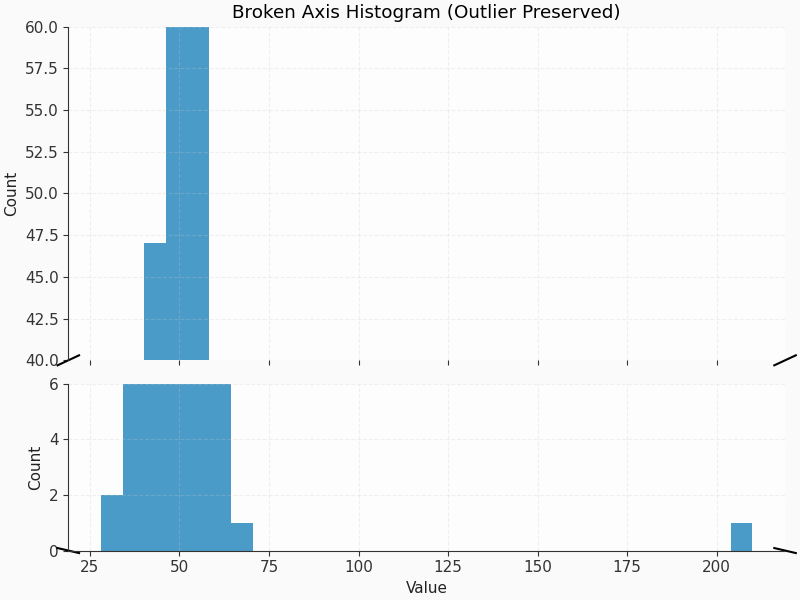

In [20]:
# This pattern is useful when you have *one or two* extreme outliers.
# Don't use it to "hide" bad data.
# Handle outliers with a broken y-axis to preserve detail.

vals = np.concatenate([rng.normal(size=300) * 5 + 50, [210]])

fig, (ax_main, ax_full) = plt.subplots(
    2, 1, sharex=True, figsize=(8, 6),
    gridspec_kw={"height_ratios": [2, 1]}, constrained_layout=True
)

bins = 30
ax_main.hist(vals, bins=bins, color="#0072B2", alpha=0.7)
ax_full.hist(vals, bins=bins, color="#0072B2", alpha=0.7)

# Focus on dense region vs full range
ax_main.set_ylim(40, 60)
ax_full.set_ylim(0, 6)

ax_main.set_title("Broken Axis Histogram (Outlier Preserved)")
ax_full.set_xlabel("Value")
ax_full.set_ylabel("Count")
ax_main.set_ylabel("Count")

# Hide connecting spines
ax_main.spines["bottom"].set_visible(False)
ax_full.spines["top"].set_visible(False)
ax_main.tick_params(labelbottom=False)

# Add diagonal break marks
d = 0.015
for ax, sign in [(ax_main, -1), (ax_full, 1)]:
    kwargs = dict(transform=ax.transAxes, color="k", clip_on=False)
    ax.plot((-d, +d), (sign * d, sign * -d), **kwargs)
    ax.plot((1 - d, 1 + d), (sign * d, sign * -d), **kwargs)

plt.show()


### 5.4 Inset / Zoom Plot

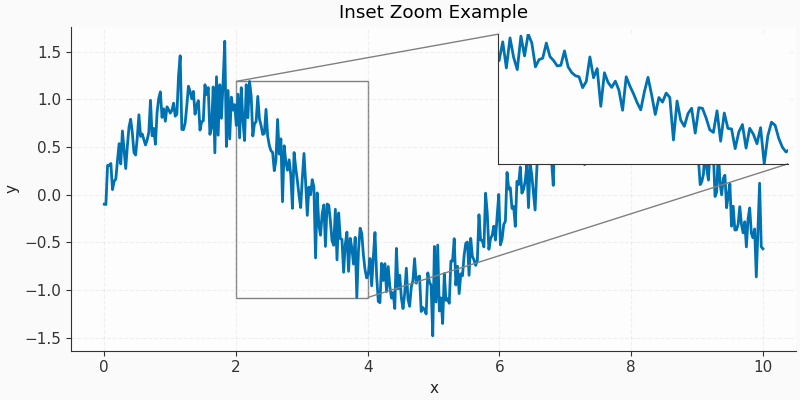

In [21]:
# Inset zoom — focus on a local region while keeping global context.

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

x = np.linspace(0, 10, 400)
y = np.sin(x) + 0.2 * rng.normal(size=len(x))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y, lw=2)
ax.set(title="Inset Zoom Example", xlabel="x", ylabel="y")

# Create inset axis and plot zoomed region
axins = inset_axes(ax, width="40%", height="40%", loc="upper right")
axins.plot(x, y, lw=2)

# Define zoom window
x_min, x_max = 2, 4
mask = (x >= x_min) & (x <= x_max)
axins.set_xlim(x_min, x_max)
axins.set_ylim(y[mask].min(), y[mask].max())

# Clean inset ticks + connector lines
axins.set_xticks([])
axins.set_yticks([])
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", lw=1)

plt.show()


### 5.5 3D Surface plot

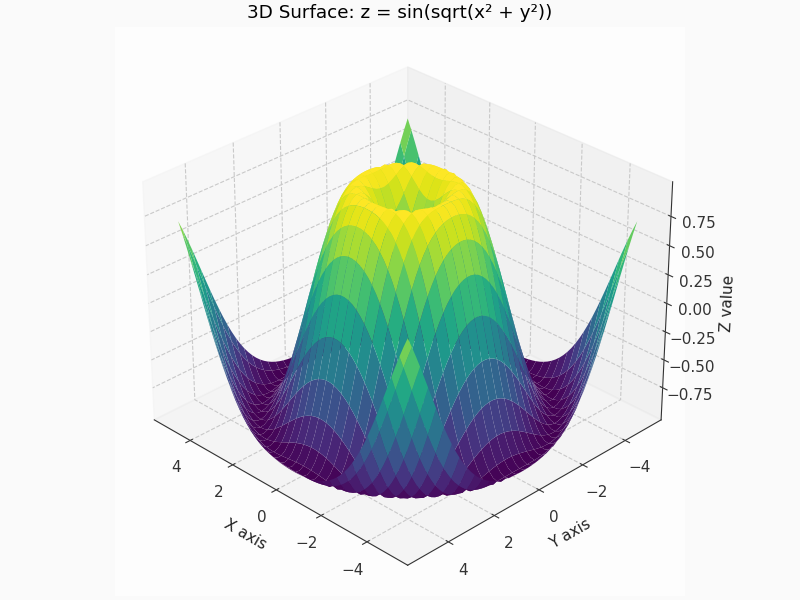

In [22]:
# 3D surface — when z = f(x, y) encodes real structure.

u = np.linspace(-5, 5, 60)
v = np.linspace(-5, 5, 60)
U, V = np.meshgrid(u, v)
Z = np.sin(np.sqrt(U**2 + V**2))

# 3D plotting toolkit is available via projection="3d"
# (Axes3D import kept here for compatibility with older Matplotlib versions)
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(U, V, Z, cmap="viridis", linewidth=0, antialiased=True)
ax.view_init(elev=30, azim=135)

ax.set(title="3D Surface: z = sin(sqrt(x² + y²))",
       xlabel="X axis", ylabel="Y axis", zlabel="Z value")

plt.show()


### 5.6 Dense Clouds: Hexbin & Rasterized Scatter

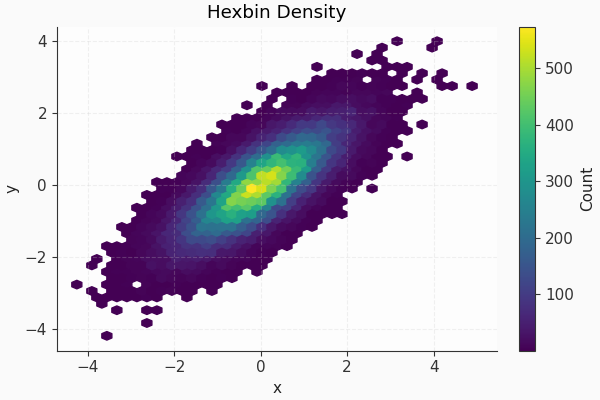

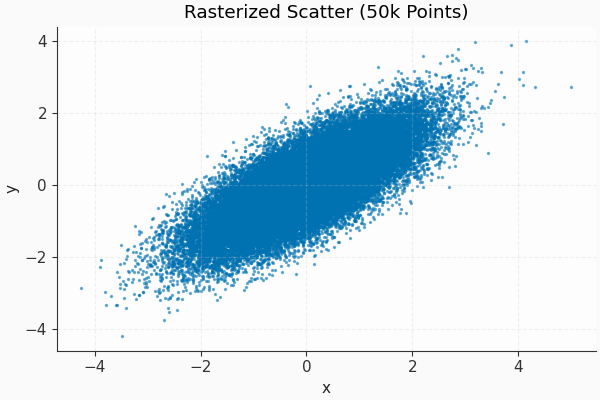

In [23]:
# Visualizing dense data — hexbin for density, rasterized scatter for speed.

x = rng.normal(size=50_000)
y = 0.7 * x + 0.6 * rng.normal(size=50_000)

# Hexbin (density)
fig, ax = plt.subplots(figsize=(6, 4))
hb = ax.hexbin(x, y, gridsize=40, mincnt=1)
fig.colorbar(hb, ax=ax, label="Count")
ax.set(title="Hexbin Density", xlabel="x", ylabel="y")
plt.show()

# Rasterized scatter (fast)
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(x, y, s=2, alpha=0.5, rasterized=True)
ax.set(title="Rasterized Scatter (50k Points)", xlabel="x", ylabel="y")
plt.show()


### 5.7 Many Lines Fast — LineCollection

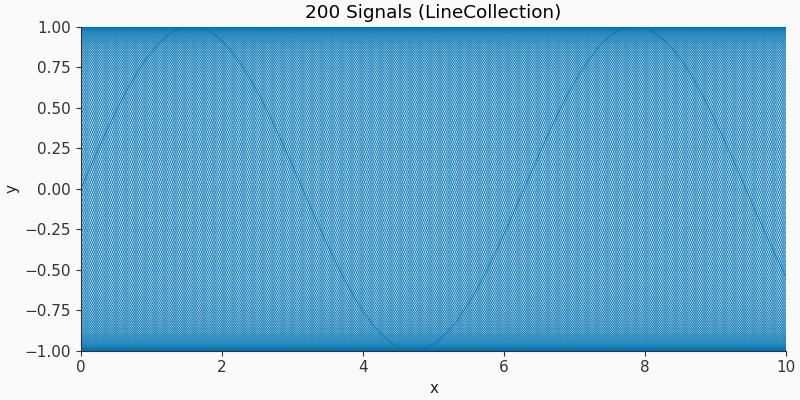

In [24]:
# Plot many lines efficiently using LineCollection (faster than loops).

from matplotlib.collections import LineCollection

x = np.linspace(0, 10, 1_000)
Y = np.array([np.sin(x + s) for s in np.linspace(0, 2 * np.pi, 200)])
segs = [np.column_stack([x, y]) for y in Y]

fig, ax = plt.subplots(figsize=(8, 4))
ax.add_collection(LineCollection(segs, lw=0.8, alpha=0.7))
ax.set_xlim(x.min(), x.max())
ax.set_ylim(Y.min(), Y.max())
ax.set(title="200 Signals (LineCollection)", xlabel="x", ylabel="y")
plt.show()


## 6) Pandas → Matplotlib for Reporting (Business Plots Fast)

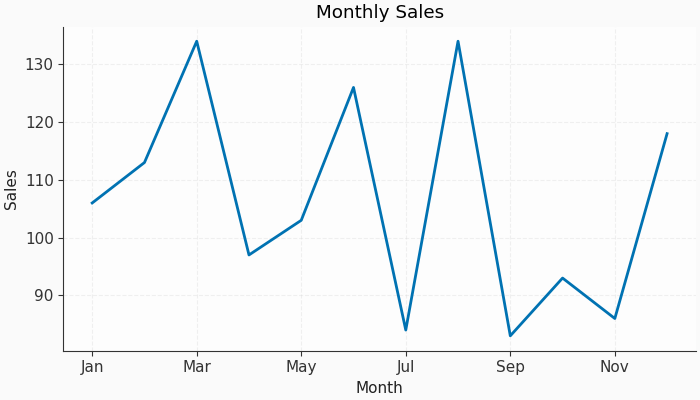

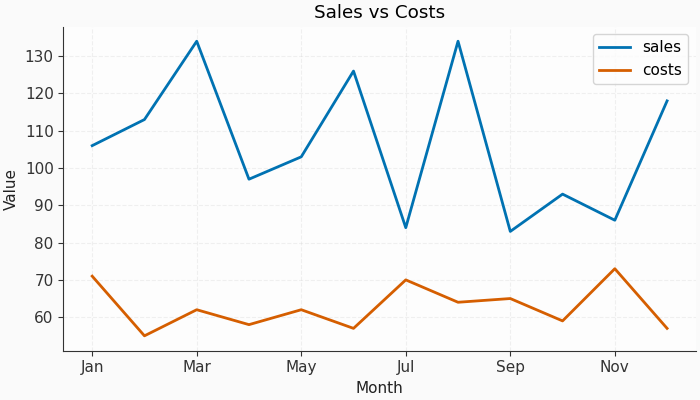

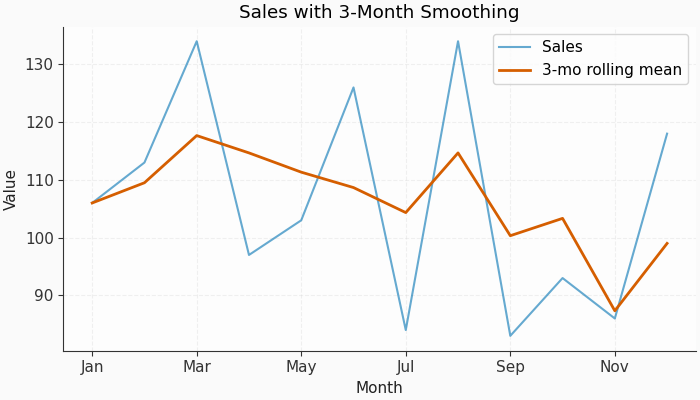

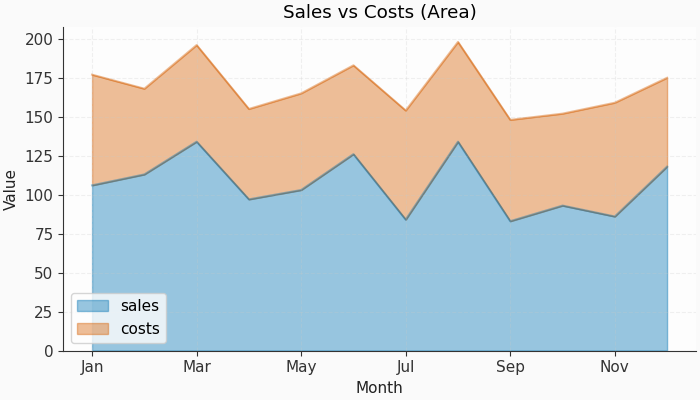

In [25]:
# Quick EDA plots directly from Pandas — fast and dashboard-friendly.

df_monthly = pd.DataFrame({
    "month": ["Jan","Feb","Mar","Apr","May","Jun",
              "Jul","Aug","Sep","Oct","Nov","Dec"],
    "sales": rng.integers(80, 140, 12),
    "costs": rng.integers(40, 100, 12),
}).set_index("month")

# Single series
ax = df_monthly["sales"].plot(kind="line", figsize=(7, 4), lw=2, title="Monthly Sales")
ax.set(xlabel="Month", ylabel="Sales")
plt.show()

# Multiple series
ax = df_monthly.plot(y=["sales", "costs"], figsize=(7, 4), lw=2, title="Sales vs Costs")
ax.set(xlabel="Month", ylabel="Value")
plt.show()

# Rolling mean overlay
ax = df_monthly["sales"].plot(figsize=(7, 4), alpha=0.6, label="Sales")
df_monthly["sales"].rolling(3, min_periods=1).mean().plot(ax=ax, lw=2, label="3-mo rolling mean")
ax.set(title="Sales with 3-Month Smoothing", xlabel="Month", ylabel="Value")
ax.legend()
plt.show()

# Stacked area chart
ax = df_monthly.plot.area(alpha=0.4, figsize=(7, 4), title="Sales vs Costs (Area)")
ax.set(xlabel="Month", ylabel="Value")
plt.show()


### DataFrame Quick Check


In [26]:
# Inspect your data before plotting — structure, preview, stats.

df_monthly.info()
display(df_monthly.head())
display(df_monthly.describe().T)


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Jan to Dec
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   12 non-null     int64
 1   costs   12 non-null     int64
dtypes: int64(2)
memory usage: 588.0+ bytes


,sales,costs
month,,
Jan,106,71
Feb,113,55
Mar,134,62
Apr,97,58
May,103,62


,count,mean,std,min,25%,50%,75%,max
sales,12.0,106.416667,18.661864,83.0,91.25,104.5,120.00,134.0
costs,12.0,62.750000,6.001894,55.0,57.75,62.0,66.25,73.0


### Why Iris?

We now switch to a real structured dataset (Iris) to show how you would explore an actual ML dataset:

- Class balance
- Feature distributions
- Correlation structure
- Pairwise relationships

This same workflow applies to fraud detection, churn prediction, marketing response, and most tabular ML problems.


## 7) Iris Dataset Overview

In [27]:
# Load the Iris dataset — classic multivariate data for visualization demos.

iris = load_iris(as_frame=True)
df = iris.frame.rename(columns={"target": "species"})
df["species"] = df["species"].map(dict(enumerate(iris.target_names)))

print("Shape:", df.shape)
df.info()
display(df.head())
display(df.describe().T)


Shape: (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### 7.1 Class Balance (Iris)

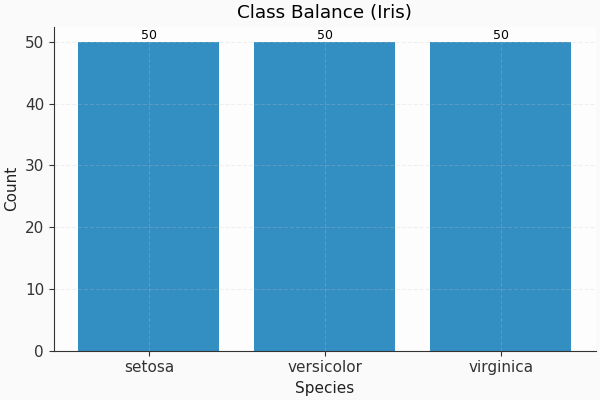

In [28]:
# Check class balance — essential before modeling.

counts = df["species"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts.index, counts.values, alpha=0.8)
ax.set(title="Class Balance (Iris)", xlabel="Species", ylabel="Count")

# Add value labels
for i, v in enumerate(counts.values):
    ax.text(i, v, str(v), ha="center", va="bottom", fontsize=9)

plt.show()


### 7.2 Numeric Feature Distributions

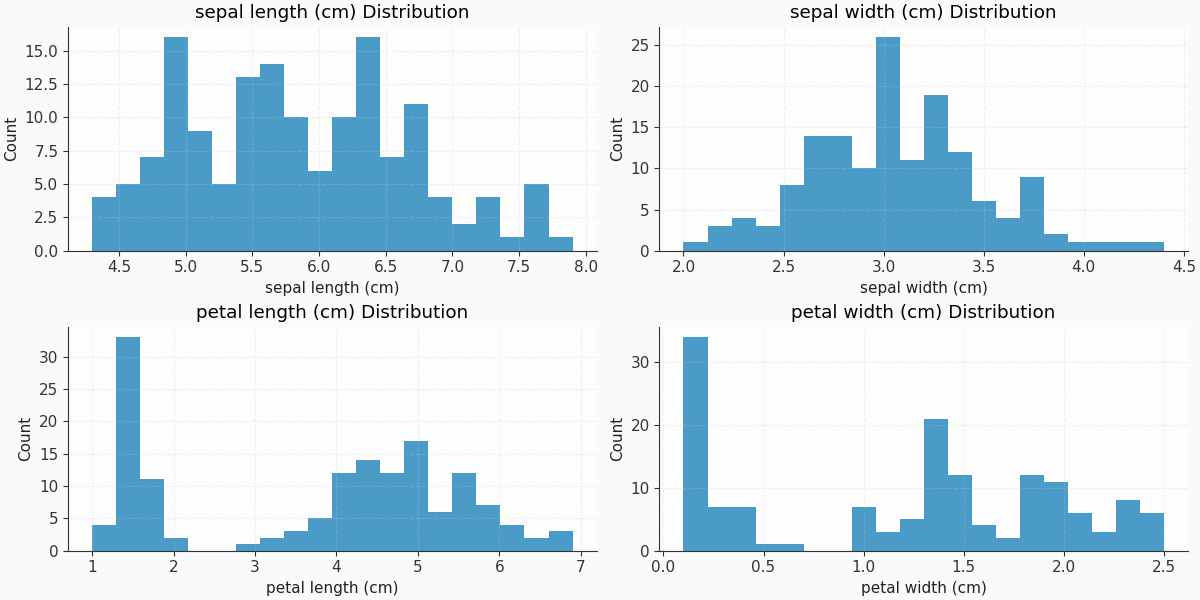

In [29]:
# Overview of numeric feature distributions — spot skew, scale, outliers.

num_cols = df.select_dtypes(include=[np.number]).columns
n = len(num_cols)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows), constrained_layout=True)
axes = np.atleast_1d(axes).ravel()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set(title=f"{col} Distribution", xlabel=col, ylabel="Count")

# Hide unused subplots
for ax in axes[i + 1:]:
    ax.set_visible(False)

plt.show()


### 7.3 Feature Scatter by Class

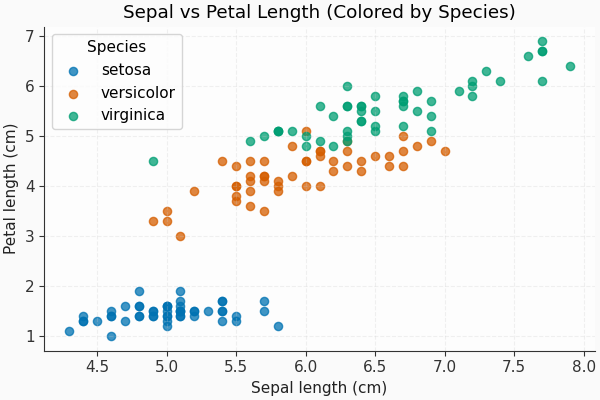

In [30]:
# Scatter two features colored by class — check separability.

fig, ax = plt.subplots(figsize=(6, 4))
for sp in sorted(df["species"].unique()):
    subset = df[df["species"] == sp]
    ax.scatter(subset["sepal length (cm)"], subset["petal length (cm)"],
               alpha=0.75, s=35, label=sp)

ax.set(title="Sepal vs Petal Length (Colored by Species)",
       xlabel="Sepal length (cm)", ylabel="Petal length (cm)")
ax.legend(title="Species")
plt.show()


### 7.4 Feature Correlation (Iris)

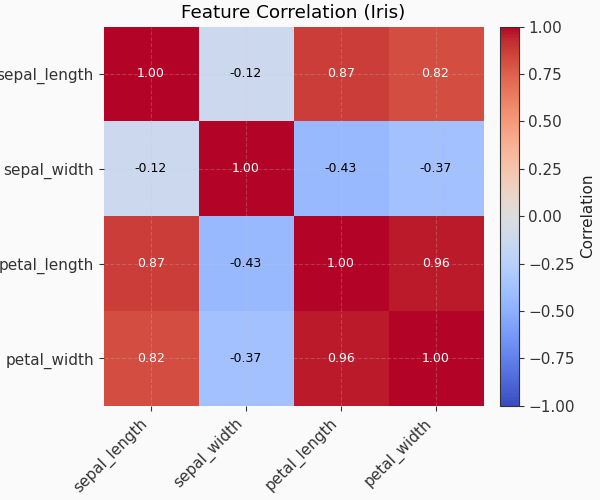

In [31]:
# Correlation heatmap — detect redundancy or informative contrasts.

corr = df.select_dtypes(include=[np.number]).corr().round(2)
cols = corr.columns
short = [c.replace(" (cm)", "").replace(" ", "_") for c in cols]

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1, interpolation="nearest")

ax.set(title="Feature Correlation (Iris)",
       xticks=range(len(cols)), xticklabels=short,
       yticks=range(len(cols)), yticklabels=short)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Annotate values
for i in range(len(cols)):
    for j in range(len(cols)):
        val = corr.iloc[i, j]
        ax.text(j, i, f"{val:.2f}", ha="center", va="center",
                color="white" if abs(val) > 0.5 else "black", fontsize=9)

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04, label="Correlation")
for s in ax.spines.values():
    s.set_visible(False)
plt.show()


### 7.5 Feature Spread & Scale (Box / Violin)

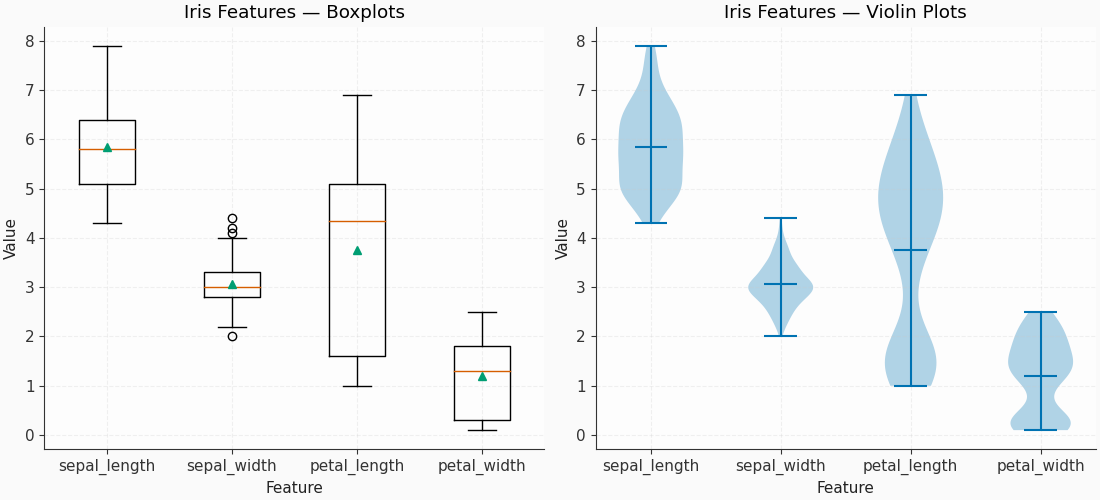

In [32]:
# Compare feature distributions side by side — box vs violin.

num_cols = df.select_dtypes(include=[np.number]).columns
short = [c.replace(" (cm)", "").replace(" ", "_") for c in num_cols]

fig, axs = plt.subplots(1, 2, figsize=(11, 5), constrained_layout=True)

# Boxplots — summary stats
axs[0].boxplot([df[c] for c in num_cols], labels=short, showmeans=True)
axs[0].set(title="Iris Features — Boxplots", xlabel="Feature", ylabel="Value")

# Violin plots — full density
axs[1].violinplot([df[c] for c in num_cols], showmeans=True, showextrema=True, showmedians=False)
axs[1].set(title="Iris Features — Violin Plots", xlabel="Feature", ylabel="Value")
axs[1].set_xticks(range(1, len(short) + 1))
axs[1].set_xticklabels(short)

plt.show()


### 7.6 Scatter Matrix (Iris)

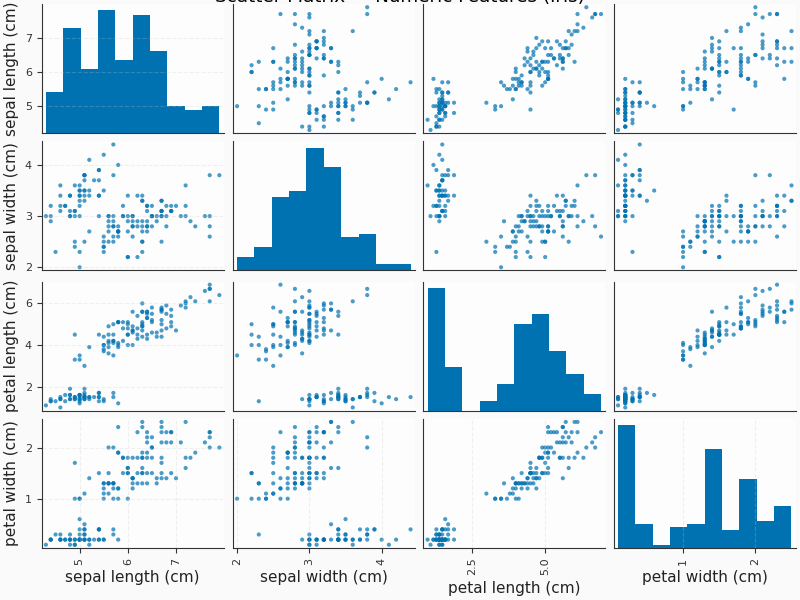

In [33]:
# Pairwise scatter matrix — relationships, clusters, outliers at a glance.

from pandas.plotting import scatter_matrix

num_df = df.select_dtypes(include=[np.number])
scatter_matrix(num_df, figsize=(8, 6), diagonal="hist", alpha=0.7, color="#0072B2")


plt.suptitle("Scatter Matrix — Numeric Features (Iris)", y=1.02)
plt.show()

# Note:
# scatter_matrix scales badly for wide tables (>15 columns).
# In production you'd select only top business features.


### Save Figure Example 

Saved → figures/export_example.png
Saved: export_example.png


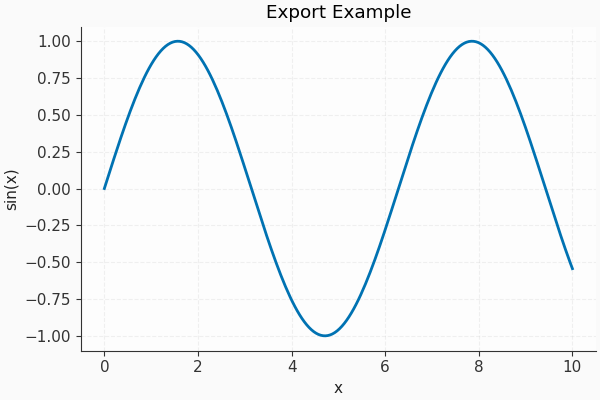

In [34]:
# Export clean, high-resolution figures for reports and slides.

x = np.linspace(0, 10, 200)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, lw=2)
ax.set(title="Export Example", xlabel="x", ylabel="sin(x)")

savefig(fig, "export_example.png", dpi=300)
print("Saved: export_example.png")

# savefig(fig, "export_example.png"); plt.close(fig)


## 8) Signature Visuals — From Analysis to Storytelling

### 8.1 KPI Storyline (Launch → Peak → Stabilization)

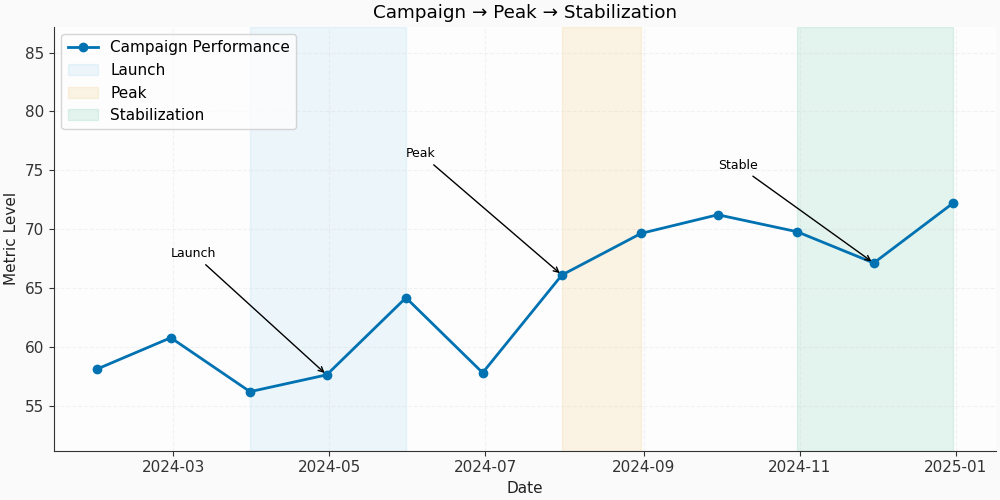

In [35]:
# Visualize KPI evolution — phases, peaks, and callouts tell the story.

fig, ax = plt.subplots(figsize=(10, 5))

dates = pd.date_range("2024-01-01", periods=12, freq="M")
vals = np.cumsum(rng.normal(0, 5, len(dates))) + 50

ax.plot(dates, vals, marker="o", lw=2, label="Campaign Performance")

# Phases
ax.axvspan(dates[2], dates[4], alpha=0.10, color="#56B4E9", label="Launch")
ax.axvspan(dates[6], dates[7], alpha=0.10, color="#E69F00", label="Peak")
ax.axvspan(dates[9], dates[11], alpha=0.10, color="#009E73", label="Stabilization")

# Callouts
ax.annotate("Launch", xy=(dates[3], vals[3]), xytext=(dates[1], vals[3] + 10),
            arrowprops=dict(arrowstyle="->"), fontsize=9)
ax.annotate("Peak", xy=(dates[6], vals[6]), xytext=(dates[4], vals[6] + 10),
            arrowprops=dict(arrowstyle="->"), fontsize=9)
ax.annotate("Stable", xy=(dates[10], vals[10]), xytext=(dates[8], vals[10] + 8),
            arrowprops=dict(arrowstyle="->"), fontsize=9)

ax.set(title="Campaign → Peak → Stabilization", xlabel="Date", ylabel="Metric Level")
ax.set_ylim(vals.min() - 5, vals.max() + 15)
ax.grid(alpha=0.2)
ax.legend(loc="upper left")
fig.autofmt_xdate(rotation=0, ha="center")
plt.show()


### 8.2 Dashboard Grid (KPI + Distribution + Categories + ROC)

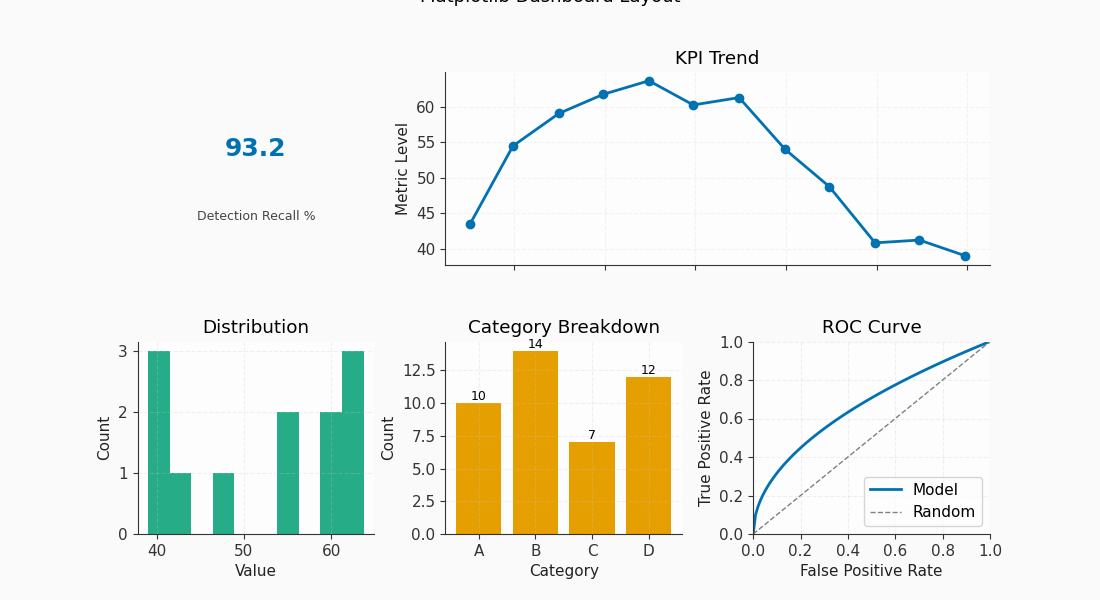

In [36]:
# Compact dashboard layout — combines KPIs, distribution, category breakdown, and model ROC.

import matplotlib.gridspec as gridspec

def kpi_box(ax, value, label):
    """Small KPI tile with a big number and a label.
    Useful for dashboard-style summaries (recall %, cost saved, etc.).
    """
    ax.axis("off")
    ax.text(
        0.5, 0.6, f"{value:.1f}",
        ha="center", va="center",
        fontsize=18, fontweight="bold", color="#0072B2"
    )
    ax.text(
        0.5, 0.25, label,
        ha="center", va="center",
        fontsize=9, color="#444"
    )

# --- fake KPI timeseries (monthly) just for demo ---
dates_kpi = pd.date_range("2024-01-01", periods=12, freq="M")
vals_kpi = np.cumsum(rng.normal(0, 5, len(dates_kpi))) + 50

# --- fake distribution data (we'll reuse vals_kpi) ---
dist_vals = vals_kpi

# --- fake category breakdown data ---
cats = ["A", "B", "C", "D"]
before = [10, 14, 7, 12]

# --- fake ROC curve data ---
fpr = np.linspace(0, 1, 100)
tpr = np.sqrt(fpr)  # just a curve with decent lift

fig = plt.figure(figsize=(11, 6))
outer = gridspec.GridSpec(2, 3, wspace=0.3, hspace=0.4)

# KPI tile (top-left)
axKPI1 = fig.add_subplot(outer[0, 0])
kpi_box(axKPI1, 93.2, "Detection Recall %")

# KPI trend (top-middle to top-right)
axA = fig.add_subplot(outer[0, 1:3])
axA.plot(dates_kpi, vals_kpi, color="#0072B2", lw=2, marker="o")
axA.set(title="KPI Trend", xlabel="Date", ylabel="Metric Level")
axA.grid(alpha=0.2)
fig.autofmt_xdate(rotation=0, ha="center")

# Distribution (bottom-left)
axB = fig.add_subplot(outer[1, 0])
axB.hist(dist_vals, bins=10, color="#009E73", alpha=0.85)
axB.set(title="Distribution", xlabel="Value", ylabel="Count")

# Category breakdown (bottom-middle)
axC = fig.add_subplot(outer[1, 1])
axC.bar(cats, before, color="#E69F00")
axC.set(title="Category Breakdown", xlabel="Category", ylabel="Count")
for i, v in enumerate(before):
    axC.text(i, v, str(v), ha="center", va="bottom", fontsize=9)

# ROC curve (bottom-right)
axD = fig.add_subplot(outer[1, 2])
axD.plot(fpr, tpr, lw=2, label="Model")
axD.plot([0, 1], [0, 1], "--", color="gray", lw=1, label="Random")
axD.set(
    title="ROC Curve",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    xlim=(0, 1),
    ylim=(0, 1)
)
axD.legend(loc="lower right")

plt.suptitle("Matplotlib Dashboard Layout", y=1.02, fontsize=13)
plt.show()


### 8.3 Perceptual Colormaps

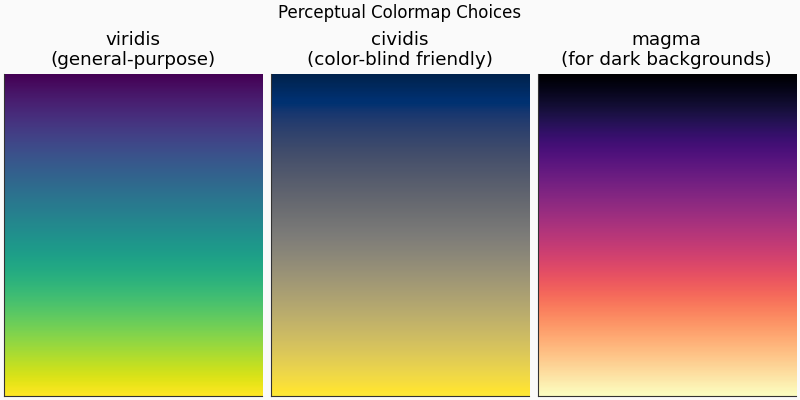

In [37]:
# Choose perceptually uniform colormaps — honest, balanced, accessible.

fig, axs = plt.subplots(1, 3, figsize=(8, 4), constrained_layout=True)

X = np.outer(np.linspace(0, 1, 128), np.ones(128))
configs = [
    ("viridis", "viridis\n(general-purpose)"),
    ("cividis", "cividis\n(color-blind friendly)"),
    ("magma",   "magma\n(for dark backgrounds)")
]

for ax, (cmap, title) in zip(axs, configs):
    ax.imshow(X, aspect="auto", cmap=cmap)
    ax.set(title=title, xticks=[], yticks=[])

plt.suptitle("Perceptual Colormap Choices", fontsize=12)
plt.show()


### 8.4 Category Contribution vs Baseline (Diverging Bar)

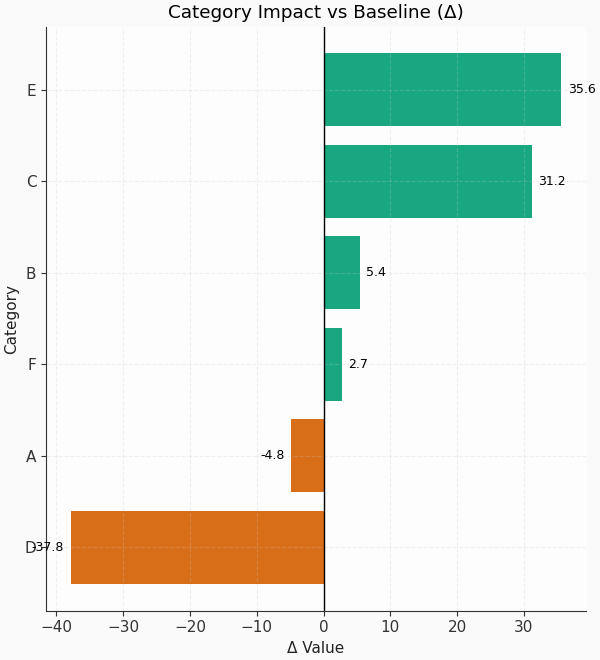

In [38]:
# Show positive vs negative category contributions around a 0 baseline.

cats = ["A", "B", "C", "D", "E", "F"]
vals = rng.normal(0, 1, len(cats)) * 25

order = np.argsort(vals)
cats_sorted, vals_sorted = np.array(cats)[order], vals[order]

colors = np.where(vals_sorted > 0, "#009E73", "#D55E00")

fig, ax = plt.subplots(figsize=(6, 6.6))
ax.barh(cats_sorted, vals_sorted, color=colors, alpha=0.9)
ax.axvline(0, color="black", lw=1)

for y, v in zip(cats_sorted, vals_sorted):
    ax.text(v + (1 if v >= 0 else -1), y, f"{v:.1f}",
            va="center", ha="left" if v >= 0 else "right", fontsize=9)

ax.set(title="Category Impact vs Baseline (Δ)", xlabel="Δ Value", ylabel="Category")
plt.show()


### 8.5 High-Density Visualization (Scatter vs Hexbin vs 2D Hist)

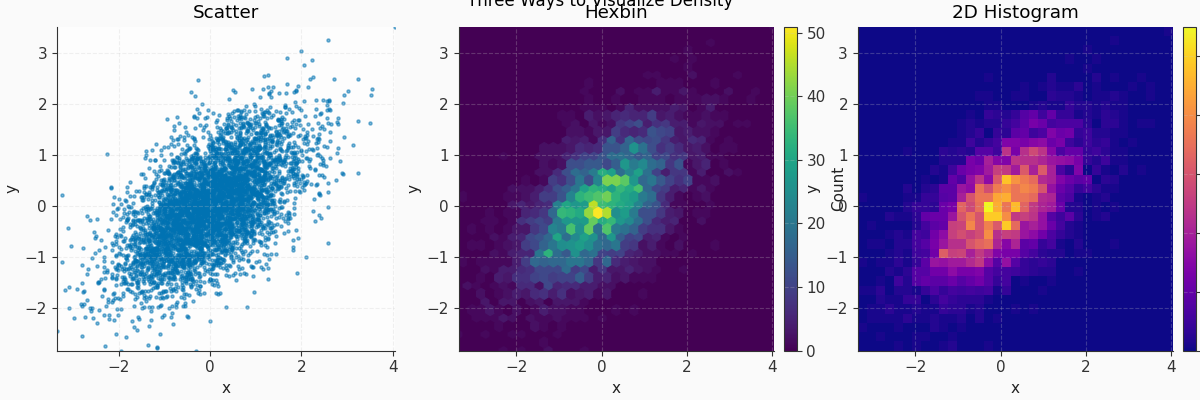

In [39]:
# Compare three density views for large point clouds: scatter, hexbin, 2D histogram.

from mpl_toolkits.axes_grid1 import make_axes_locatable

x = rng.normal(size=5000)
y = 0.5 * x + rng.normal(scale=0.7, size=5000)

fig, axs = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)
xlim, ylim = (x.min(), x.max()), (y.min(), y.max())

# Scatter
axs[0].scatter(x, y, s=5, alpha=0.5, color="#0072B2")
axs[0].set(title="Scatter", xlabel="x", ylabel="y", xlim=xlim, ylim=ylim)

# Hexbin
hb = axs[1].hexbin(x, y, gridsize=35, cmap="viridis")
axs[1].set(title="Hexbin", xlabel="x", ylabel="y", xlim=xlim, ylim=ylim)
cax1 = make_axes_locatable(axs[1]).append_axes("right", size="4%", pad=0.1)
fig.colorbar(hb, cax=cax1, label="Count")

# 2D Histogram
h2 = axs[2].hist2d(x, y, bins=35, cmap="plasma")
axs[2].set(title="2D Histogram", xlabel="x", ylabel="y", xlim=xlim, ylim=ylim)
cax2 = make_axes_locatable(axs[2]).append_axes("right", size="4%", pad=0.1)
fig.colorbar(h2[3], cax=cax2, label="Count")

fig.suptitle("Three Ways to Visualize Density", fontsize=12, y=1.02)
plt.show()


### 8.6 Radar / Spider Chart (Model Profile)

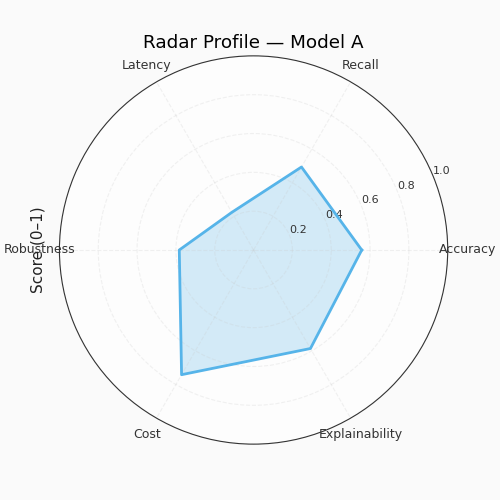

In [40]:
# Radar (spider) chart — compare multidimensional profiles visually.


labels = ["Accuracy", "Recall", "Latency", "Robustness", "Cost", "Explainability"]
values = rng.random(len(labels))

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles_closed = np.r_[angles, angles[0]]
values_closed = np.r_[values, values[0]]

fig, ax = plt.subplots(subplot_kw={"polar": True}, figsize=(5, 5))
ax.plot(angles_closed, values_closed, lw=2, color="#56B4E9", label="Model A")
ax.fill(angles_closed, values_closed, alpha=0.25, color="#56B4E9")

ax.set(title="Radar Profile — Model A", ylim=(0, 1))
ax.set_xticks(angles)
ax.set_xticklabels(labels, fontsize=9)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=8)
ax.set_ylabel("Score (0–1)", labelpad=10)
plt.show()


# NOTE:
# Radar charts are good for communication with stakeholders (fast shape comparison),
# but they are not precise for analysis/threshold tuning. Use them in slides, not audits.

### 8.7 Custom Colormap Design

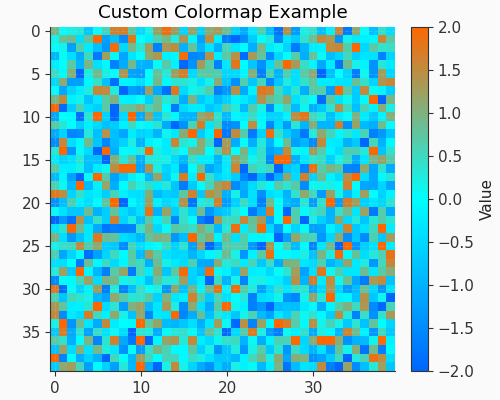

In [41]:
# Create a custom colormap — for brand identity or emphasis regions.

from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list(
    "brand_gradient", ["#0066FF", "#00FFFF", "#FF6600"]
)

data = rng.normal(size=(40, 40))

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(data, cmap=custom_cmap, vmin=-2, vmax=2, interpolation="nearest")
ax.set(title="Custom Colormap Example")

cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Value")
plt.show()


### 8.8 Insight Panel 

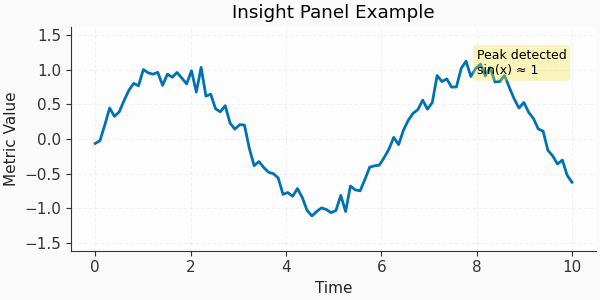

In [42]:
# Embed the insight directly in the chart — highlight, don't just show.

x = np.linspace(0, 10, 100)
y = np.sin(x) + 0.1 * rng.normal(size=len(x))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(x, y, color="#0072B2", lw=2)
ax.set(title="Insight Panel Example", xlabel="Time", ylabel="Metric Value")
ax.grid(alpha=0.2)

# Insight box slightly above the curve (no overlap)
ax.text(8, 1.1, "Peak detected\nsin(x) ≈ 1",
        fontsize=9, va="center", ha="left",
        bbox=dict(boxstyle="round,pad=0.3", fc="#F0E442", alpha=0.35, ec="none"))

ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
plt.show()


### 8.9 Fraud Detection View — Imbalanced Classes

Fraud is ~0.2%. The plots show:
- how small the fraud class is
- how its risk scores separate from normal traffic


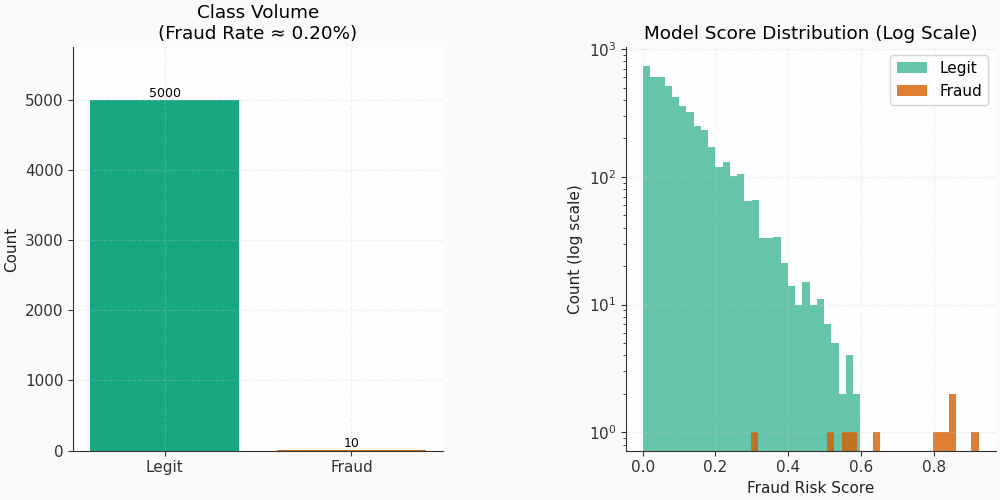

In [43]:
# Simulate highly imbalanced fraud data
n_legit = 5000
n_fraud = 10  # ~0.2% fraud rate

fraud_rate = n_fraud / (n_legit + n_fraud) * 100

labels = ["Legit", "Fraud"]
counts = [n_legit, n_fraud]

fig, axs = plt.subplots(
    1, 2,
    figsize=(10, 5),
    constrained_layout=True,
    gridspec_kw={"wspace": 0.25}
)

# --- Left: Class imbalance bar
axs[0].bar(labels, counts, color=["#009E73", "#D55E00"], alpha=0.9)

axs[0].set(
    title=f"Class Volume\n(Fraud Rate ≈ {fraud_rate:.2f}%)",
    ylabel="Count"
)

# Give some headroom so text labels aren't glued to the top
axs[0].set_ylim(0, max(counts) * 1.15)

# Add value labels on top of bars
for i, v in enumerate(counts):
    axs[0].text(i, v, str(v), ha="center", va="bottom", fontsize=9)

# --- Right: Score distribution (pretend model outputs)
# Legit ~ low score, Fraud ~ high score
rng_local = np.random.default_rng(42)
legit_scores = rng_local.beta(1, 8, size=n_legit)      # skewed toward 0
fraud_scores = rng_local.beta(4, 1.5, size=n_fraud)    # skewed toward 1

axs[1].hist(
    legit_scores, bins=30, alpha=0.6,
    label="Legit", color="#009E73"
)
axs[1].hist(
    fraud_scores, bins=30, alpha=0.8,
    label="Fraud", color="#D55E00"
)

axs[1].set_yscale("log")  # important for rare class visibility
axs[1].set(
    title="Model Score Distribution (Log Scale)",
    xlabel="Fraud Risk Score",
    ylabel="Count (log scale)"
)
axs[1].legend()
plt.show()


### 8.10 Operational ROC View — Chosen Threshold

Mark the operating point: the threshold the business is using right now.


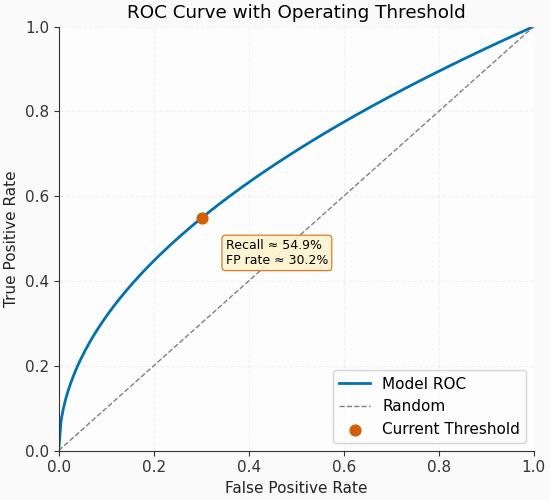

In [44]:
# Fake ROC curve data
fpr = np.linspace(0, 1, 200)
tpr = np.sqrt(fpr)  # pretend model with lift (not random)

# Choose an "operating point" ~ somewhere in the mid-range
op_idx = 60  # pick an index on the curve
op_fpr = fpr[op_idx]
op_tpr = tpr[op_idx]

fig, ax = plt.subplots(figsize=(5.5, 5))
ax.plot(fpr, tpr, lw=2, label="Model ROC")
ax.plot([0, 1], [0, 1], "--", lw=1, color="gray", label="Random")

# Mark the chosen threshold point
ax.scatter(op_fpr, op_tpr, s=60, color="#D55E00", zorder=5, label="Current Threshold")

# Annotate with business text (not math text)
ax.text(
    op_fpr + 0.05,
    op_tpr - 0.05,
    f"Recall ≈ {op_tpr*100:.1f}%\nFP rate ≈ {op_fpr*100:.1f}%",
    fontsize=9,
    va="top",
    bbox=dict(
        boxstyle="round,pad=0.3",
        fc="#FFF3CD",
        ec="#D55E00",
        lw=0.8,
        alpha=0.9
    )
)

ax.set(
    title="ROC Curve with Operating Threshold",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    xlim=(0, 1),
    ylim=(0, 1)
)
ax.legend(loc="lower right")
plt.show()


## 9) Best Practices & Pitfalls (Quick Read)

1. Always start with `fig, ax = plt.subplots()` — keep control of your axes.
2. Centralize styling in `rcParams` so every plot looks consistent.
3. Use `constrained_layout=True` (or set it once in `rcParams`) to avoid overlapping labels.
4. Use log scales for heavy tails and rare events (fraud, latency spikes, etc.).
5. Keep legends short and clear; don't restate the entire story in the legend.
6. Only add color when it means something (category, status, alert) — not just decoration.
7. Annotate only what's important (peaks, shifts, anomalies). Don't label every point.
8. Prefer perceptual colormaps (`viridis`, `cividis`, `magma`) for heatmaps and intensities.
9. Export figures with `savefig(..., dpi=300, bbox_inches="tight")` for reports/slides.
10. Include units in axis labels and version your output files (`figures/roc_v2.png`), so they’re usable in real dashboards.


## 10) Cheat Sheet — Core Visualization Patterns

| Goal                      | Function / Pattern                                                                 | When to use                                                   | Caution / Tip                                                                 |
|---------------------------|-------------------------------------------------------------------------------------|---------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Line**                  | `ax.plot(x, y)`                                                                    | Show trends over x (time, index, steps)                       | Always label axes; add legend if >1 line                                     |
| **Scatter**               | `ax.scatter(x, y, alpha=...)`                                                      | Show relation between two variables                           | For large N: use `alpha`, `hexbin`, or `hist2d`                              |
| **Bar / Barh**            | `ax.bar(...)`, `ax.barh(...)`                                                      | Compare categories or segments                                | Sort by value; add value labels if needed                                    |
| **Diverging Bar**         | Horizontal bars around `0`, colored by sign                                        | Show positive vs negative impact                              | Add baseline `axvline(0)`; sort by impact                                    |
| **Histogram**             | `ax.hist(x, bins=30)`                                                              | Show 1D distribution of a variable                            | Try log scale for heavy tails                                                |
| **KDE**                   | `gaussian_kde(data)` → `ax.plot(...)`                                              | Smooth version of a histogram                                | Needs enough samples; bandwidth matters                                      |
| **ECDF**                  | `ax.step(sorted(x), F(x))`                                                         | Cumulative share / median view                                | Great for small samples                                                      |
| **Box / Violin**          | `ax.boxplot(...)`, `ax.violinplot(...)`                                            | Compare spread, skew, outliers                                | Box = summary; Violin = full shape                                           |
| **Time Series + Phases**  | `ax.plot(...)` + `ax.axvspan(...)` + `ax.annotate(...)`                            | Tell a story (Launch → Peak → Stabilization)                  | Mark only key periods                                                        |
| **Error Bars**            | `ax.errorbar(x, y, yerr=...)`                                                      | Show uncertainty or variability                               | Add baseline for context                                                     |
| **Twin Axes**             | `ax2 = ax1.twinx()`                                                                | Plot two metrics with same x, different scales                | Label both y-axes clearly; avoid confusion                                   |
| **Broken Axis**           | Two subplots (`sharex=True`) with different `ylim`                                 | Show outlier without hiding main range                        | Indicate the axis break visually (diagonal slashes, etc.)                    |
| **Inset / Zoom**          | `inset_axes()`, `mark_inset(...)`                                                  | Zoom into local detail inside the main plot                   | Remove inset ticks; outline zoom region                                      |
| **Density (Hexbin)**      | `ax.hexbin(x, y, gridsize=...)` + colorbar                                         | 2D density for large scatter                                  | Adjust `gridsize`; explain color meaning                                     |
| **2D Histogram**          | `ax.hist2d(x, y, bins=...)` + colorbar                                             | Binned density heatmap                                        | Bin size changes interpretation                                              |
| **Many Lines Fast**       | `LineCollection(segs)`                                                             | 100+ lines / simulations / runs                               | Set axis limits manually; faster than looping                               |
| **Scatter Matrix**        | `scatter_matrix(df[numeric_cols], diagonal="hist", alpha=0.7)`                     | All-pairs feature relationships                               | Can get crowded fast; use alpha                                             |
| **Correlation Heatmap**   | `ax.imshow(corr, cmap=..., vmin=-1, vmax=1)` + annotations                         | See redundant or related features                             | Use perceptual cmap; label strong cells                                     |
| **Radar / Spider**        | Polar subplot + closed polygon (`ax.plot` + `ax.fill`)                             | Compare multi-metric profiles (0–1 scale)                     | Good for communication, not precision                                      |
| **3D Surface**            | `ax.plot_surface(X, Y, Z, cmap=...)`                                               | Plot z = f(x, y) surfaces (terrain, loss maps, etc.)          | Control view with `ax.view_init()`                                          |
| **Dashboard Grid**        | `gridspec.GridSpec(...)` + multi-subplots                                          | Combine KPIs / diagnostics in one figure                      | Label each tile clearly; consistent suptitle                                |
| **Insight / Alert Tile**  | Small line + `ax.text(..., bbox=...)` callout                                      | Highlight a single takeaway (“peak detected”, “investigate”)  | One insight per tile only                                                   |
| **Custom Colormap**       | `LinearSegmentedColormap.from_list([...])`                                         | Brand-colored or thematic heatmaps                            | Keep contrast; document meaning                                            |
| **Export Figure**         | `fig.savefig("figures/01_name.png", dpi=300, bbox_inches="tight", facecolor=...)`  | Save for slides / reports / dashboards                        | Version filenames; include units in axis labels                             |
